In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier

In [4]:
glass=pd.read_csv("Glass.csv")

['building_windows_float_processed' 'building_windows_non_float_processed'
 'containers' 'headlamps' 'tableware' 'vehicle_windows_float_processed']
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 100}
-1.8692331064846457


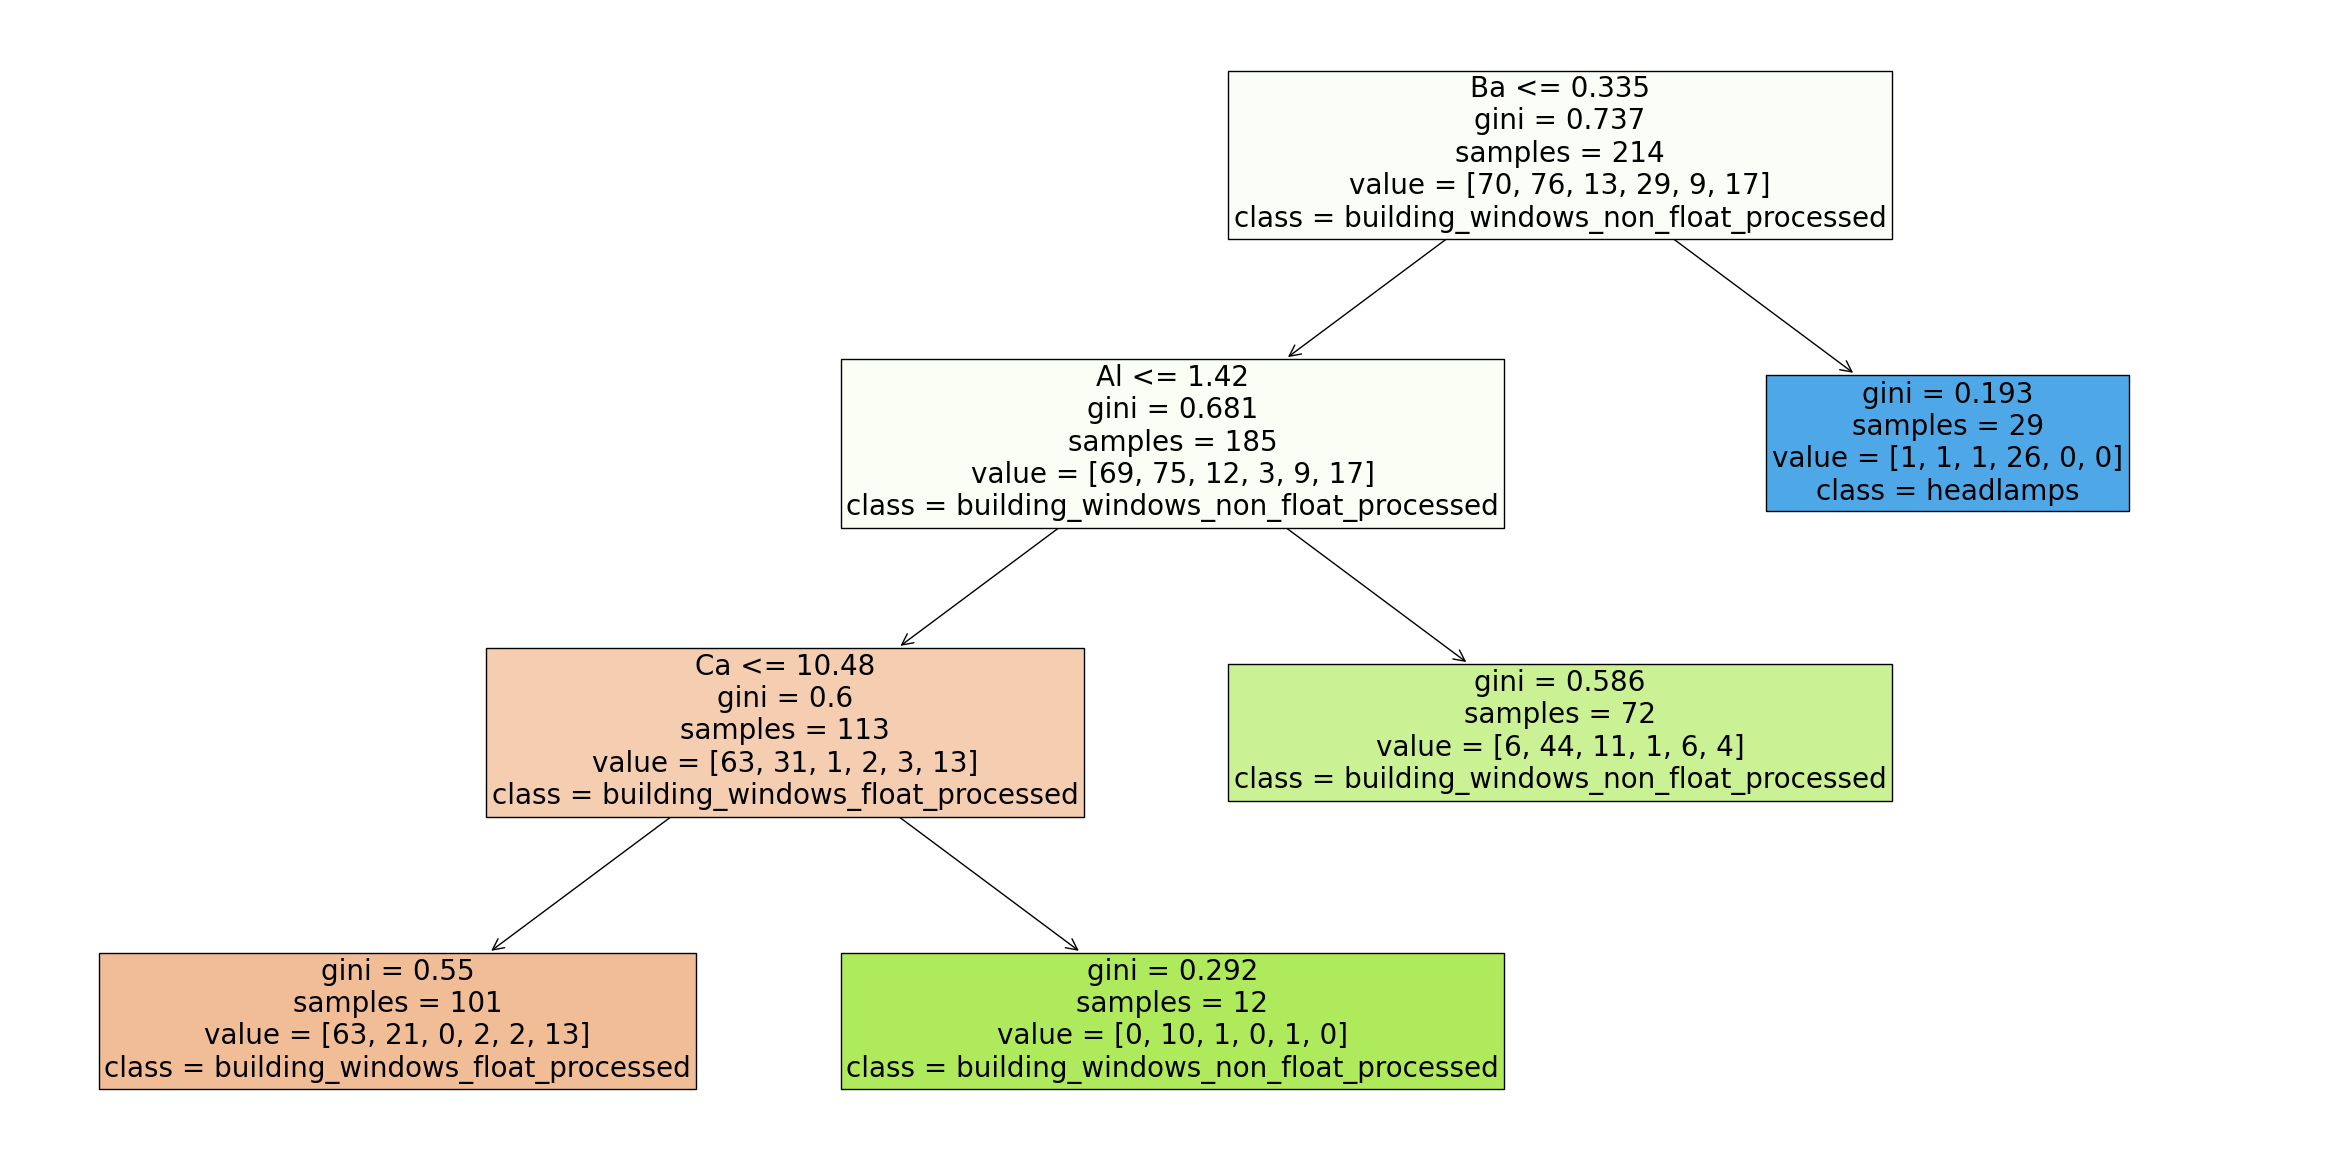

In [5]:
x = glass.drop('Type',axis = 1)
y = glass['Type']

le=LabelEncoder()
le_y=le.fit_transform(y)
print(le.classes_)

kfold = StratifiedKFold(n_splits = 5 ,shuffle=True,random_state=23)
params = {'min_samples_split':[2,5,10,20,60,80,100,None],'max_depth':[3,4,5,6,7,None],'min_samples_leaf':[1,5,10,20]}
dct = DecisionTreeClassifier(random_state=42)

gcv = GridSearchCV(dct, param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(x,le_y)
print(gcv.best_params_)
print(gcv.best_score_)


bm_tree=gcv.best_estimator_
plt.figure(figsize=(30,15))
plot_tree(bm_tree,feature_names=list(x.columns),class_names=list(le.classes_),filled=True,fontsize=20)
plt.show()


In [6]:
tst_glass=pd.read_csv("tst_Glass.csv")
predictions=bm_tree.predict(tst_glass)
print(predictions)
le.inverse_transform(predictions)

[3 0 3 3 3]


array(['headlamps', 'building_windows_float_processed', 'headlamps',
       'headlamps', 'headlamps'], dtype=object)

In [7]:
boston=pd.read_csv("Boston.csv")

0.5923085197343092


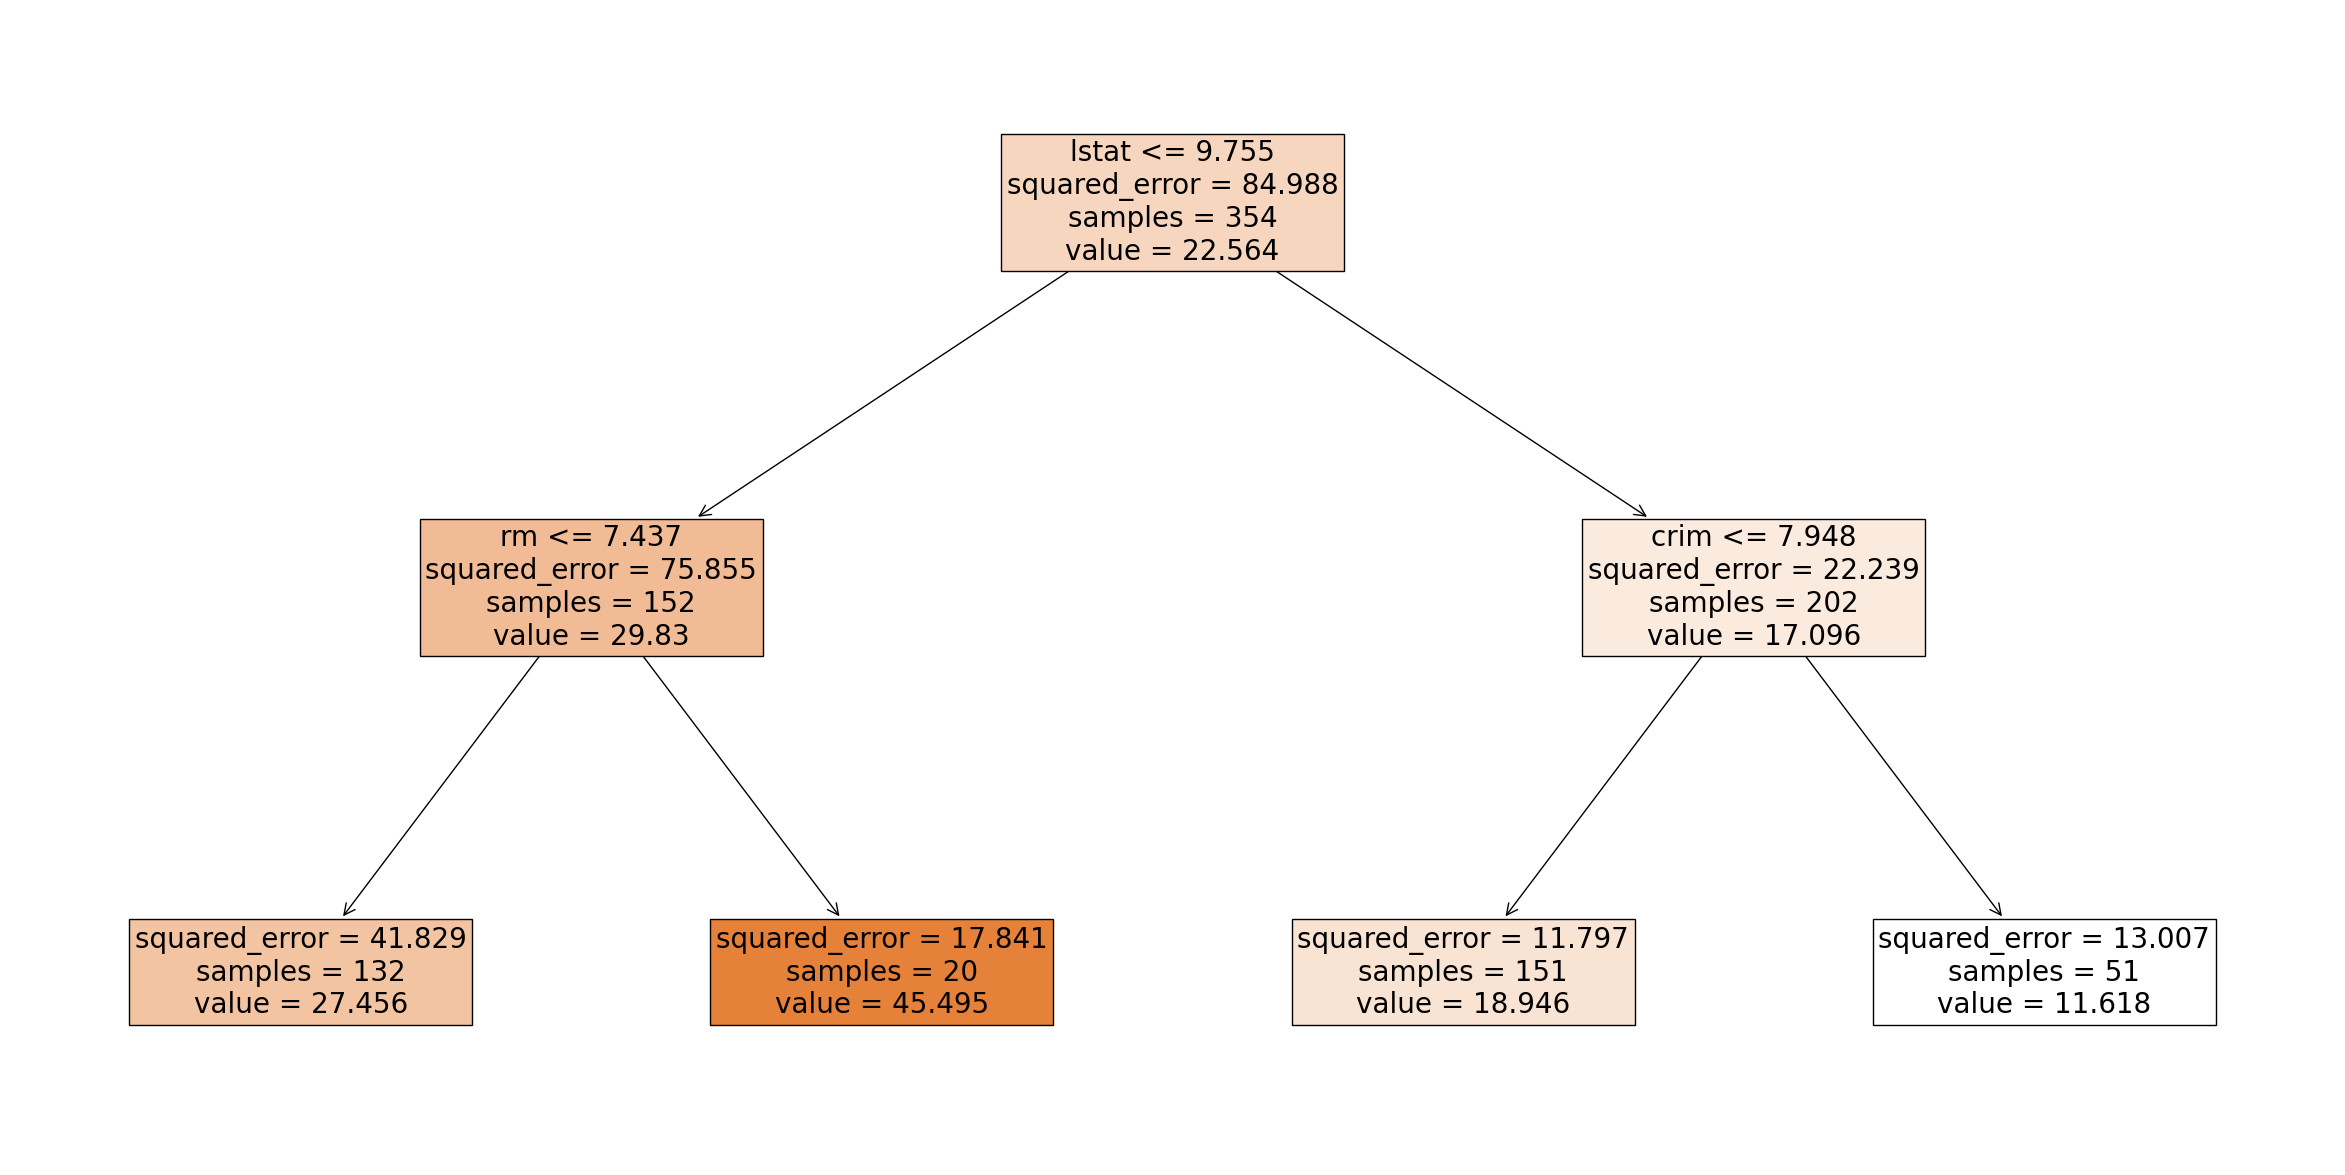

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.704 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.647 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.569 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.704 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.647 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.569 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, 

In [8]:
x=boston.drop('medv',axis=1)
y=boston['medv'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)
dtr=DecisionTreeRegressor(random_state=23,max_depth=2)
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print(r2_score(y_test,y_pred))
plt.figure(figsize=(30,15))
plot_tree(dtr,feature_names=list(x.columns),filled=True,fontsize=20)
plt.show()

params = {'min_samples_split':[2,5,10,20,60,80,100,None],'max_depth':[3,4,5,6,7,None],'min_samples_leaf':[1,5,10,20]}
dtr=DecisionTreeRegressor(random_state=23)
kfold =KFold(n_splits = 5 ,shuffle=True,random_state=23)
gcv = GridSearchCV(dtr, param_grid=params,cv=kfold,scoring='r2',verbose=3)# write verbose 3 when we want to details
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

In [9]:
hr=pd.read_csv("HR_comma_sep.csv")
dum_hr=pd.get_dummies(hr,drop_first=True)
x=dum_hr.drop('left',axis=1)
y=dum_hr['left']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

lr=LogisticRegression()
mm_scaler=MinMaxScaler()
knn=KNeighborsClassifier()
pipe_knn=Pipeline([('SCL',mm_scaler),('KNN,knn')])
nb=GaussianNB()
voting=VotingClassifier([('LR',lr),('P_KNN',pipe_knn),('NB',nb)])



NameError: name 'GaussianNB' is not defined

In [12]:
ins=pd.read_csv("insurance.csv")

In [17]:
dum_ins=pd.get_dummies(ins,drop_first=True)
x=dum_ins.drop('charges',axis=1)
y=dum_ins['charges']

kfold = KFold(n_splits = 5 ,shuffle=True,random_state=23)
dtr = DecisionTreeRegressor(random_state=42)
params = {'min_samples_split':[2,3,4,5,6,10,20],'max_depth':[None, 2,3,4,5,6,7],'min_samples_leaf':[1,2,3,4,5,6,10,20]}

gcv = GridSearchCV(dtr, param_grid=params,cv=kfold,scoring='r2')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 20}
0.8528667162756143
